# Introduction to Deep Learning with Python

## Chapter 2: Multilayer Perceptrons

### 2.1  Network Architecture

Recall that a learning problem can be understood as approximating some function **$f^*$**, e.g. $y = f^*(x)$ maps the **input $x$** to some **output $y$**. And a learning algorithmen tries to learn the values of parameters $\theta$ so that a given function $y = f(x;\theta)$ approximates $f^*$ in the best possible way.   

In the case of the perceptron, $f(x;\theta)$ was the weighted some of the inputs and $\theta$ was the weight vector ${[w_1, w_2, ..., w_n]}$ (and the bias $b)$. A multiplayer perceptron (MLP), also called Deep Learning, Deep feedforwards network, or feedforwards neural network, expands this idea by composing many functions together:

$$f(x) = f^{(3)}(f^{(2)}(f^{(1)}(x)))$$

Such directed acyclic graph, were $f^{(1)}$ is called the **first layer**, $f^{(2)}$ is called the **second layer**, and $f^{(3)}$ is called the **third layer**, can be seen as the typical archictecture used in modern neural networks. 

![Perceptron](00_ressources/img/chapter_2/network_architecture.jpeg)

In chapter 1.2, we saw that learning $w$ is not that problematic. The real challange is having the rights inputs $x$. One way to solve this problem is to manually engineer a feature vector $\phi(x)$ from the input vector $x$ using a nonlinear transformation $\phi$. We than use $\phi(x)$ instead of $x$ to solve the problem at hand. 

As already mentioned, support vector machines use an alternative method were $\phi$ is a predefined function such as the radial basis function (RBF) kernel, which proven to be helpful in a lot of problems.  

In contrast, deep learning does neither use manually engineered features nor predefined functions but tries to learn $\phi$ from the given data:

$$y = f(x;\theta,w) = \phi(x, \theta)^{T}w,$$

where $\theta$ is a parameter vector used to learn a function $\phi$, and $w$ is a weight vector that maps from $\phi(x)$ to $y$. Or in other words, given a generic function $\phi$ parametrized as $\phi(x;\theta)$, let an algorithmen find the best $\theta$ to have a useful new repsentation (feature) of $x$.


### 2.2 XOR Problem revisited

Recall the **XOR** problem from last chapter where $X = \{[0,0], [0,1], [1,0], [1,1]\}$ and $y = \{0,1,1,0\}$. A single perceptron unit was not able to learn this problem correctly. Let's see whether a more complex models can handle it.

Similar to the example above, a neural network with one hidden layer can be written as:

$$f(x;w_1,b_1,w_2,b_2) = f^{(2)}(f^{(1)}(x)),$$

where $w_1$ is the weight vector of the hidden layer, $b_1$ is the bias vector of the hidden layer, $w_2$ is the weight vector from the hidden layer to the output layer, and $b_2$ is the corresponding bias vector.

Further one can unchain the expression and end up with 

$$h^* = f^1(x;w_1,b_1),$$

where $h^*$ is the linear output from the first hidden layer and

$$y=f^2(h;w_2,b_2)$$

is the linear output from the output layer. Finally, let $h=g(x;w_1,b_1)$ be a nonlinear activation function to the first hidden layer defined as $g(z) = max\{0,z\}$. 

In [25]:
import numpy as np
import random

# Same data (this time without bias)
X = np.array([[0,0], 
              [0,1], 
              [1,0], 
              [1,1]]
            )

# Updated label
y = np.array([0,1,1,0])

# Weights of hidden units
w_1 = np.array([[1,1],
              [1,1]
             ])

# Bias of hidden units
b_1 = np.array([0,-1])

# Weights to output
w_2 = np.array([1,-2])

# Bias to output
b_2 = 0

Starting with the hidden layer, evaluate $f(x;w_1,b_1)$ by calculating $xw_1$:

In [26]:
xw_1 = np.dot(X, w_1)
print(xw_1)

[[0 0]
 [1 1]
 [1 1]
 [2 2]]


... and add bias $b_1$ to the resulting matrix

In [27]:
xw_1b_1 = xw_1 + b_1
print(xw_1b_1)

[[ 0 -1]
 [ 1  0]
 [ 1  0]
 [ 2  1]]


Element-wise applying $max\{0,z\}$ to $xw_1 + b_1$ gives $h$

In [28]:
# Rectified linear unit
def relu(x):
    if x > 0:
        return(x)
    else:
        return(0)

f = np.vectorize(relu)    
h = f(xw_1b_1)
print(h)

[[0 0]
 [1 0]
 [1 0]
 [2 1]]


Given $h$, $y$ can be calculated as $hw_2+b_2$

In [29]:
out = np.dot(h, w_2)
out = out + b_2
print(out)

[0 1 1 0]


Recall that the initial target vector was $y = \{0,1,1,0\}$ and the neural network correctly outputs $\hat{y} = \{0,1,1,0\}$.

### 2.3 Types of hidden Units

In [30]:
%matplotlib inline

In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt

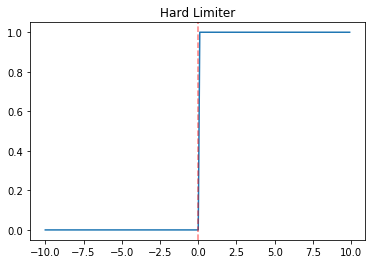

In [32]:
def unit_step(x):
    a = []
    for i in x:
        if i < 0:
            a.append(0)
        else:
            a.append(1)
    return(a)

x = np.arange(-10., 10., 0.1)
y = unit_step(x)
plt.plot(x,y)
plt.axvline(x = 0, color = 'r', alpha = .5, linestyle = 'dashed')
plt.title('Hard Limiter')
plt.show()

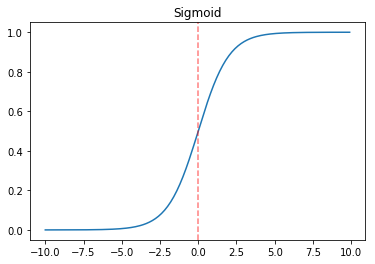

In [33]:
def sigmoid(x):
    a = []
    for i in x:
        a.append(1/(1+math.exp(-i)))
    return(a)

x = np.arange(-10., 10., 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.axvline(x = 0, color = 'r', alpha = .5, linestyle = 'dashed')
plt.title('Sigmoid')
plt.show()

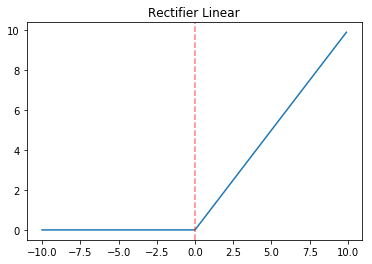

In [34]:
def relu(x):
    a = []
    for i in x:
        if i > 0:
            a.append(i)
        else:
            a.append(0)
    return(a)

x = np.arange(-10., 10., 0.1)
y = relu(x)
plt.plot(x,y)
plt.axvline(x = 0, color = 'r', alpha = .5, linestyle = 'dashed')
plt.title('Rectifier Linear')
plt.show()

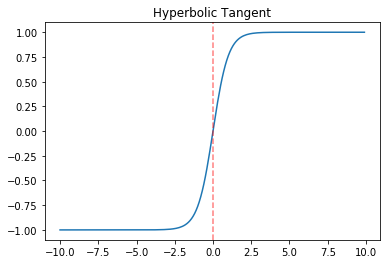

In [35]:
def tanh(x):
    a = []
    for i in x:
        a.append((math.exp(2*i)-1) / (math.exp(2*i)+1))
    return(a)

x = np.arange(-10., 10., 0.1)
y = tanh(x)
plt.plot(x,y)
plt.axvline(x = 0, color = 'r', alpha = .5, linestyle = 'dashed')
plt.title('Hyperbolic Tangent')
plt.show()